In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv('Xtrain.csv')
X.shape

(105782, 39)

In [3]:
X.head(10)

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
5,6,Isin_27,Date_26,Trader_10,1.233129,201.000000,11.823529,0.0,0.943412,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
6,7,Isin_117,Date_24,Trader_10,2.100000,5.250000,NaN,0.0,380.267415,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,8,Isin_12,Date_5,Trader_10,1.472727,13.500000,81.000000,0.0,580.891842,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
8,9,Isin_12,Date_7,Trader_10,1.633333,16.333333,16.333333,0.0,1932.224487,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,10,Isin_117,Date_7,Trader_10,1.782609,8.200000,41.000000,0.0,5834.927530,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [4]:
X.dtypes.value_counts()

float64    32
int64       4
object      3
dtype: int64

In [5]:
X=X.drop('Index', axis=1) # on supprime les colonnes inutiles
X=X.drop('Share', axis=1)
X=X.drop('Day', axis=1)


<AxesSubplot:>

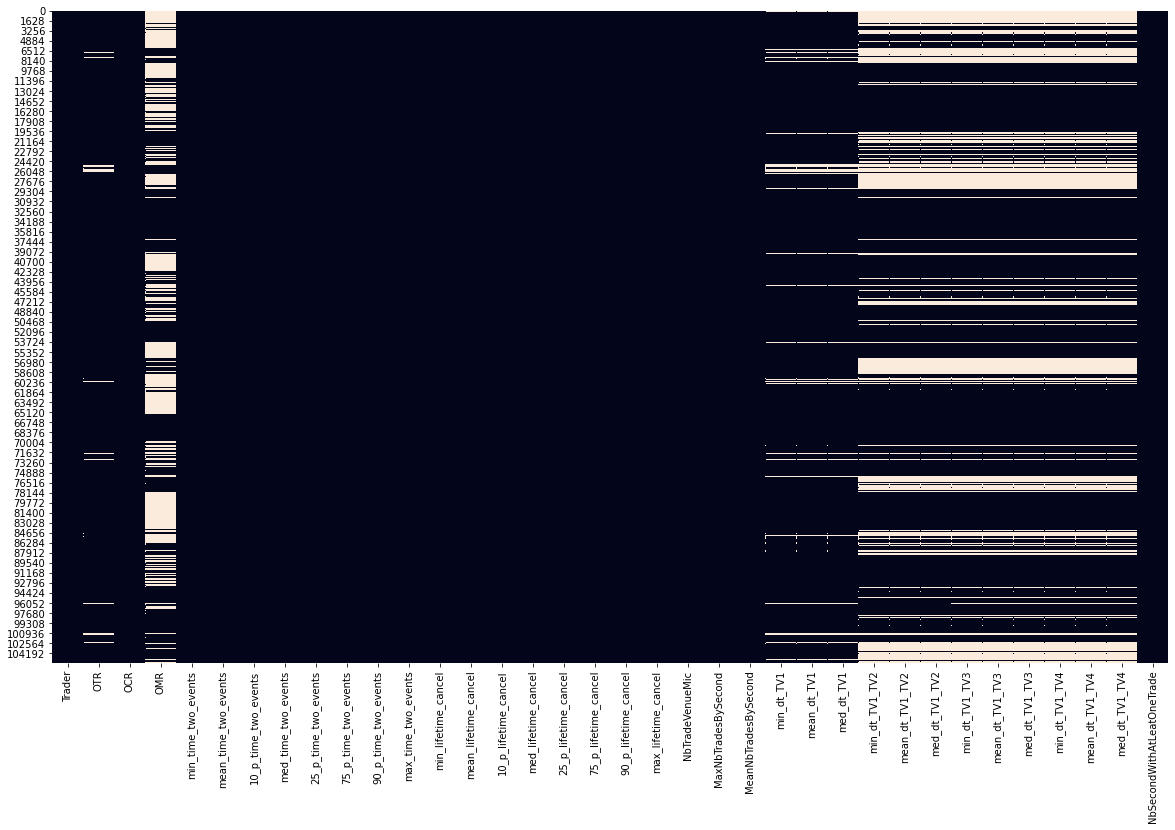

In [6]:
plt.figure(figsize=(20,12))
sns.heatmap(X.isna(),cbar=False)

In [7]:
X.isna().sum()

Trader                            0
OTR                            1683
OCR                               0
OMR                           47612
min_time_two_events               0
mean_time_two_events              0
10_p_time_two_events              0
med_time_two_events               0
25_p_time_two_events              0
75_p_time_two_events              0
90_p_time_two_events              0
max_time_two_events               0
min_lifetime_cancel               0
mean_lifetime_cancel              0
10_p_lifetime_cancel              0
med_lifetime_cancel               0
25_p_lifetime_cancel              0
75_p_lifetime_cancel              0
90_p_lifetime_cancel              0
max_lifetime_cancel               0
NbTradeVenueMic                   0
MaxNbTradesBySecond               0
MeanNbTradesBySecond              0
min_dt_TV1                     4235
mean_dt_TV1                    4235
med_dt_TV1                     4235
min_dt_TV1_TV2                25176
mean_dt_TV1_TV2             

# Premier jet (grossier) pour deployer rapidemment : on supprime toute colonne avec des NaN et on ne traite pas les outliers.

In [8]:
X.dropna(axis=1, inplace=True)

X.isna().sum()

Trader                        0
OCR                           0
min_time_two_events           0
mean_time_two_events          0
10_p_time_two_events          0
med_time_two_events           0
25_p_time_two_events          0
75_p_time_two_events          0
90_p_time_two_events          0
max_time_two_events           0
min_lifetime_cancel           0
mean_lifetime_cancel          0
10_p_lifetime_cancel          0
med_lifetime_cancel           0
25_p_lifetime_cancel          0
75_p_lifetime_cancel          0
90_p_lifetime_cancel          0
max_lifetime_cancel           0
NbTradeVenueMic               0
MaxNbTradesBySecond           0
MeanNbTradesBySecond          0
NbSecondWithAtLeatOneTrade    0
dtype: int64

In [9]:
X.shape

(105782, 22)

# On récupère la target pour chaque sample :

In [10]:
y=pd.read_csv('ytrain.csv')
y

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT
...,...,...
81,Trader_140,MIX
82,Trader_451,MIX
83,Trader_438,MIX
84,Trader_278,HFT


In [11]:
X=pd.merge(X,y, how='inner', on='Trader') #on merge le vecteur "type" sur Xtrain
X2=X.copy()
X


,Trader,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,...,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,NbSecondWithAtLeatOneTrade,type
0,Trader_10,8.333333,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.59800,...,984.32056,682.15326,23151.83800,23151.8380,23151.8380,1,7,2.750000,4,NON HFT
1,Trader_10,25.166667,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.35700,...,177.93991,73.74323,808.26230,21433.6840,21433.6840,1,17,5.933333,15,NON HFT
2,Trader_10,47.300000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.46700,...,187.99548,19.77734,418.23984,1953.6235,10842.4640,1,20,5.063492,63,NON HFT
3,Trader_10,14.500000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.71900,...,286.01932,286.01932,19187.71900,19187.7190,19187.7190,1,8,4.250000,4,NON HFT
4,Trader_10,26.750000,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.51400,...,1345.95280,662.57434,21903.78300,23164.5140,23164.5140,1,19,3.710526,38,NON HFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,Trader_60,23.000000,0.0,736.500080,0.000000,0.000188,0.000039,0.003226,1228.04750,7609.94340,...,7609.94430,7609.94430,7609.94430,7609.9443,7609.9443,1,15,6.666667,3,NON HFT
105778,Trader_60,23.000000,0.0,63.672695,0.000000,0.000963,0.000176,70.822190,307.08710,392.75638,...,567.15300,567.15300,567.15300,567.1530,567.1530,1,4,2.428571,7,NON HFT
105779,Trader_60,86.000000,0.0,708.440816,0.000000,0.000578,0.000062,1.023857,4.95412,23448.52500,...,23448.52500,23448.52500,23448.52500,23448.5250,23448.5250,1,21,4.687500,16,NON HFT
105780,Trader_60,204.000000,0.0,384.893976,0.000000,0.000536,0.000242,1.288446,119.05335,19157.80900,...,19157.80900,19157.80900,19157.80900,19157.8090,19157.8090,1,30,4.942857,35,NON HFT


In [12]:
y=X[["Trader","type"]] #on met y au bon format
y

,Trader,type
0,Trader_10,NON HFT
1,Trader_10,NON HFT
2,Trader_10,NON HFT
3,Trader_10,NON HFT
4,Trader_10,NON HFT
...,...,...
105777,Trader_60,NON HFT
105778,Trader_60,NON HFT
105779,Trader_60,NON HFT
105780,Trader_60,NON HFT


In [13]:
X=X.drop("type",axis=1) #on supprime les features non quantitatives
X=X.drop("Trader",axis=1)
X

,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,...,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,NbSecondWithAtLeatOneTrade
0,8.333333,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.59800,682.153260,...,682.153260,984.32056,682.15326,23151.83800,23151.8380,23151.8380,1,7,2.750000,4
1,25.166667,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.35700,11.866026,...,11.866026,177.93991,73.74323,808.26230,21433.6840,21433.6840,1,17,5.933333,15
2,47.300000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.46700,2.761036,...,2.761036,187.99548,19.77734,418.23984,1953.6235,10842.4640,1,20,5.063492,63
3,14.500000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.71900,286.019320,...,286.019320,286.01932,286.01932,19187.71900,19187.7190,19187.7190,1,8,4.250000,4
4,26.750000,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.51400,2.798452,...,2.798452,1345.95280,662.57434,21903.78300,23164.5140,23164.5140,1,19,3.710526,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,23.000000,0.0,736.500080,0.000000,0.000188,0.000039,0.003226,1228.04750,7609.94340,7609.944300,...,7609.944300,7609.94430,7609.94430,7609.94430,7609.9443,7609.9443,1,15,6.666667,3
105778,23.000000,0.0,63.672695,0.000000,0.000963,0.000176,70.822190,307.08710,392.75638,567.153000,...,567.153000,567.15300,567.15300,567.15300,567.1530,567.1530,1,4,2.428571,7
105779,86.000000,0.0,708.440816,0.000000,0.000578,0.000062,1.023857,4.95412,23448.52500,23448.525000,...,23448.525000,23448.52500,23448.52500,23448.52500,23448.5250,23448.5250,1,21,4.687500,16
105780,204.000000,0.0,384.893976,0.000000,0.000536,0.000242,1.288446,119.05335,19157.80900,19157.809000,...,19157.809000,19157.80900,19157.80900,19157.80900,19157.8090,19157.8090,1,30,4.942857,35


# Etude des distributions des features.

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

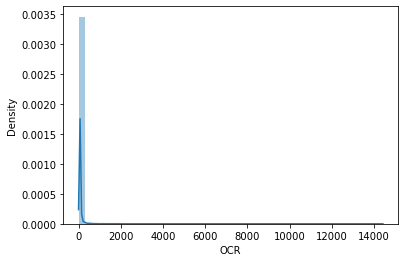

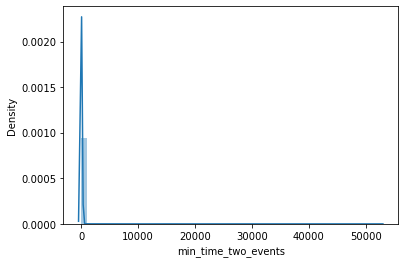

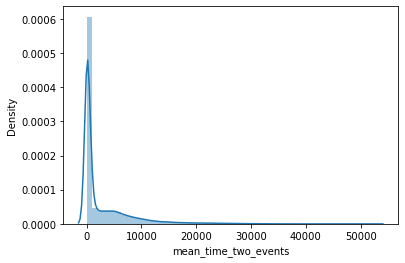

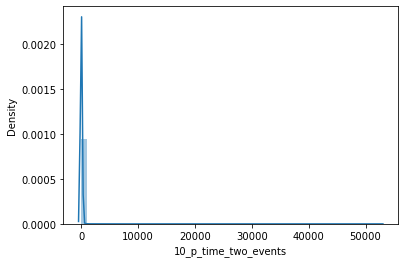

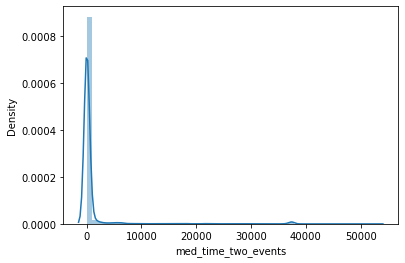

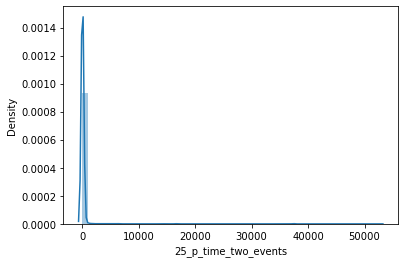

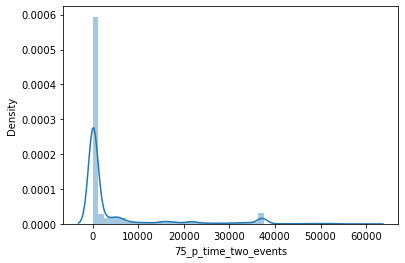

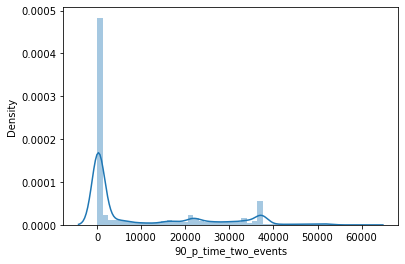

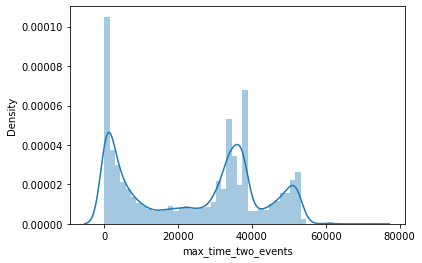

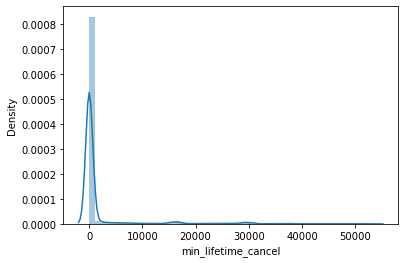

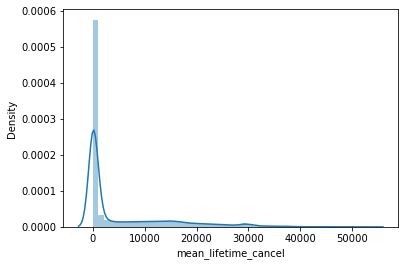

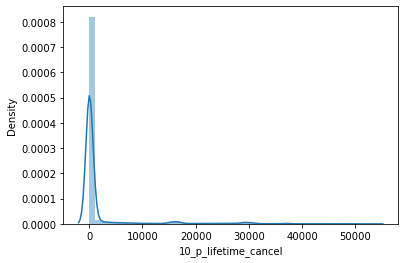

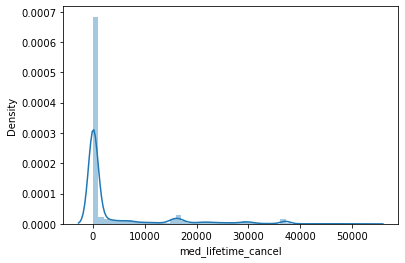

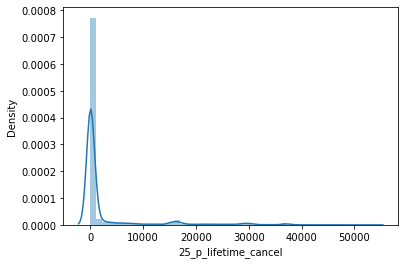

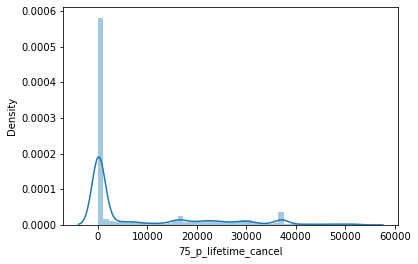

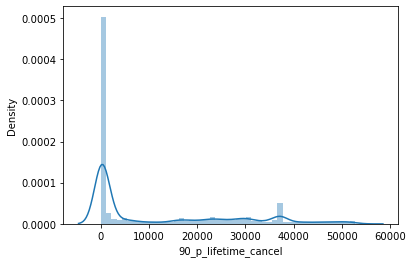

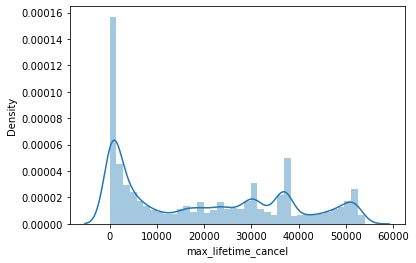

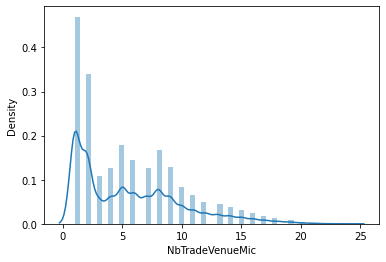

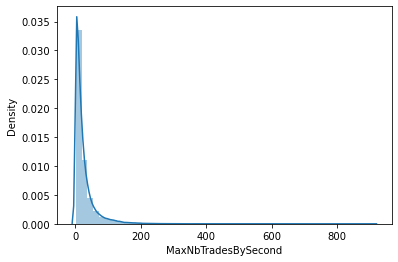

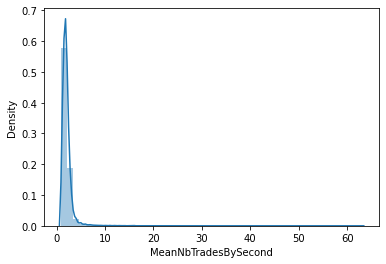

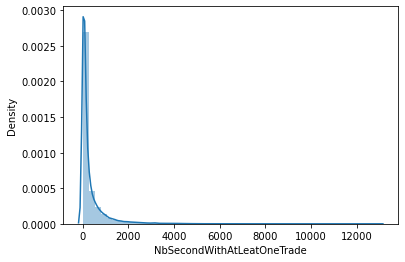

In [17]:
for col in X.columns:
    plt.figure()
    sns.distplot(X[col])

In [ ]:
NB : on peut soupçonner des outliers fréquents.
    Distributions type loi de Poisson une fois nettoyées?

# Relations features/target.

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

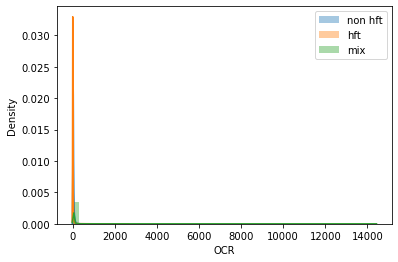

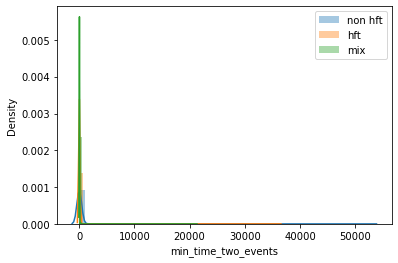

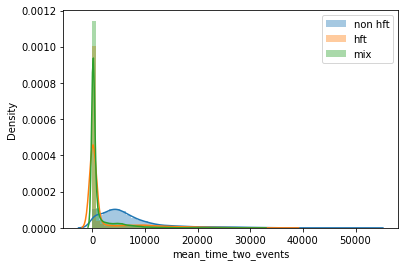

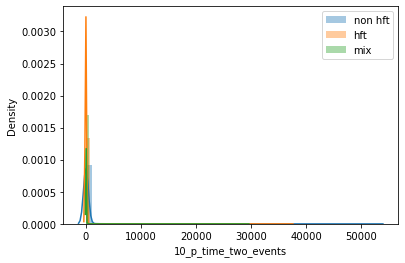

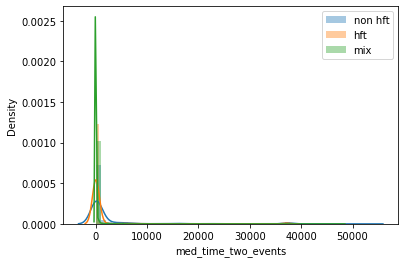

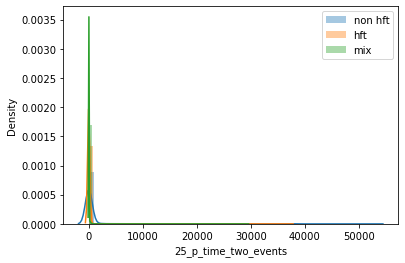

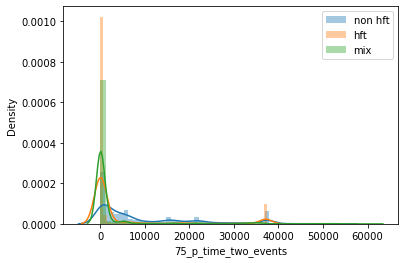

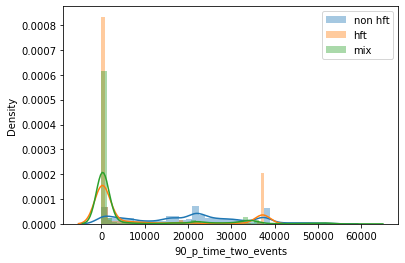

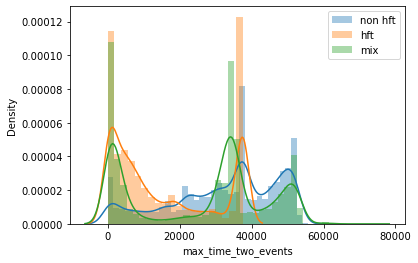

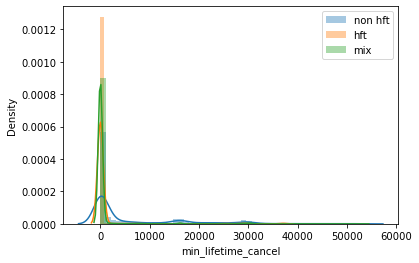

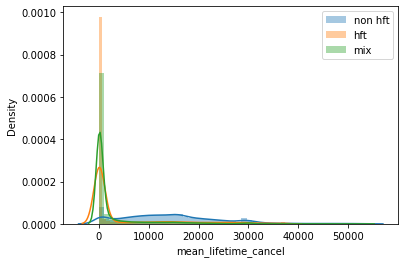

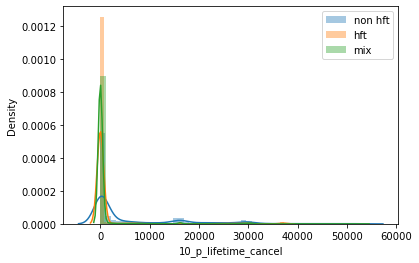

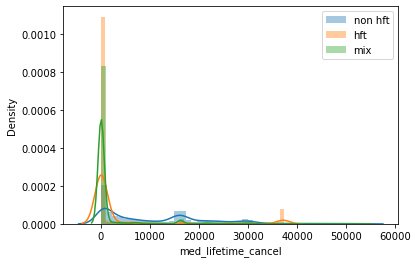

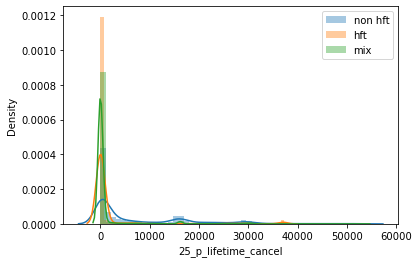

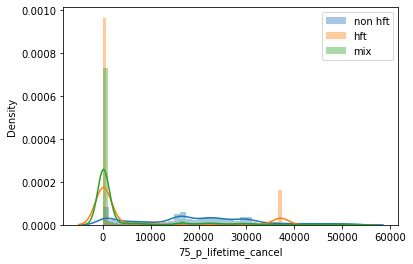

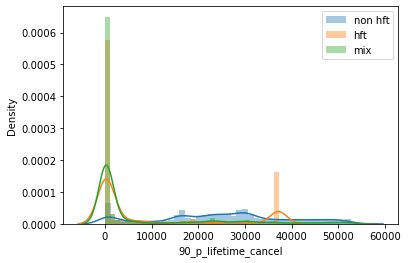

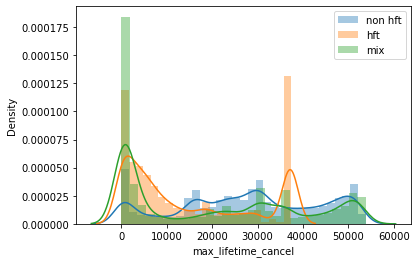

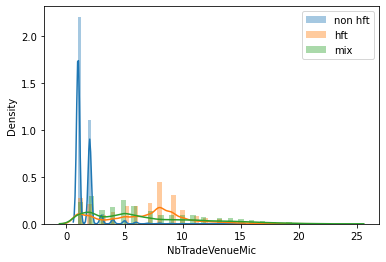

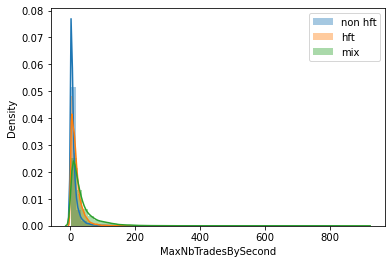

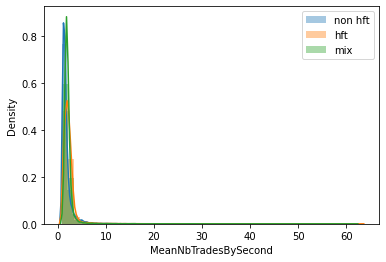

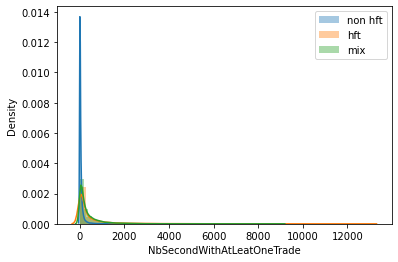

In [18]:
X2 #X2 est le df entier y compris avec les colonnes target et type encore incluses (qualitatives)

X_NON_HFT=X2[X2['type']=='NON HFT']
X_HFT=X2[X2['type']=='HFT']
X_MIX=X2[X2['type']=='MIX']

for col in X.columns:
    plt.figure()
    sns.distplot(X_NON_HFT[col], label='non hft')
    sns.distplot(X_HFT[col], label='hft')
    sns.distplot(X_MIX[col], label='mix')
    plt.legend()

# Corrélation entre les features.


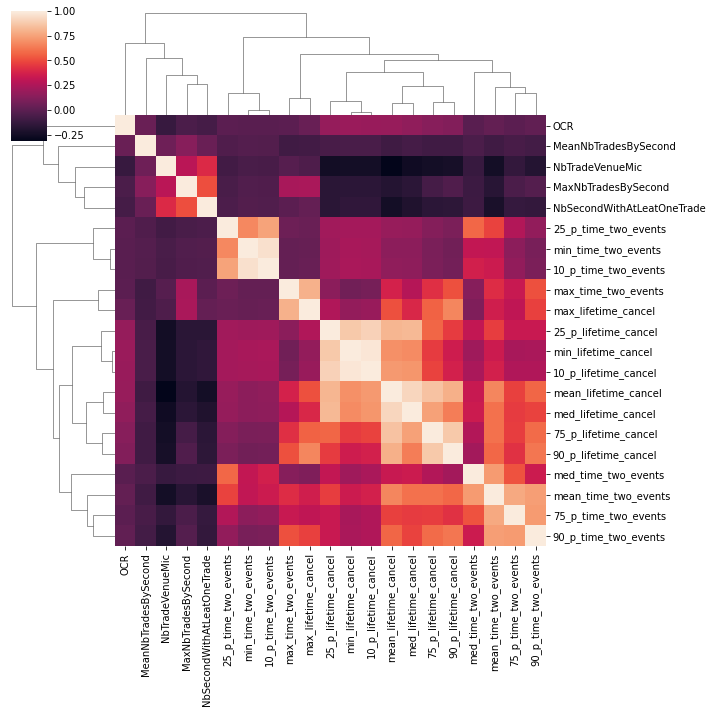

In [19]:
sns.clustermap(X.corr())

# Essai de PCA pour visualiser en deux dimensions ces 21 variables.

In [20]:
colonnes=X.columns
X2=X.copy()

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)


In [21]:
# encodage des classes de la target pour visualiser

target=y['type']
target=target.map({'MIX':0,'HFT':1, 'NON HFT':2})

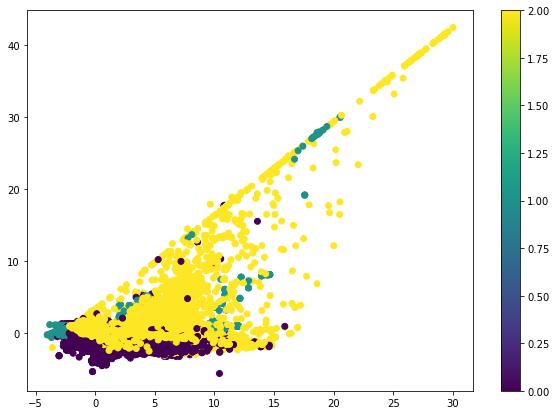

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2)

result= pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(result[:, 0],result[:, 1] , c =target)
plt.colorbar()


In [23]:
pca.components_ #coordonnées des 2 nouveaux vecteurs propres

array([[ 0.05825461,  0.12015557,  0.29873597,  0.12720031,  0.19050583,
         0.14368327,  0.23602656,  0.25399635,  0.16824356,  0.25481775,
         0.33941266,  0.2639115 ,  0.31587508,  0.2901508 ,  0.3006286 ,
         0.28183468,  0.19868753, -0.12097047, -0.05876605, -0.04274506,
        -0.0912887 ],
       [-0.02982156,  0.46270119,  0.07743464,  0.4792186 ,  0.24141155,
         0.4401558 , -0.01056052, -0.14075765, -0.25591454,  0.08182517,
        -0.10635677,  0.07505416, -0.06304657,  0.03301156, -0.18199435,
        -0.22713864, -0.28114277, -0.02710292, -0.12927721,  0.00962259,
        -0.04403109]])

In [25]:
pca.explained_variance_ratio_ #variance expliquée sur chacun des 2 axes propres

array([0.3597083 , 0.13161447])

Text(0.5, 1.0, 'explained variance percentage')

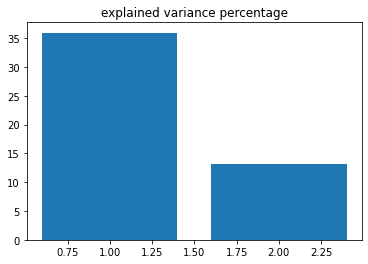

In [28]:
plt.bar(x=range(1,3),height=pca.explained_variance_ratio_*100)
plt.title('explained variance percentage')

In [29]:
# coefficients des nouveaux axes dans leur écriture comme combinaison linéaire des anciens

loading_scores=pd.Series(pca.components_[0], index=colonnes)
scores_sorted= loading_scores.abs().sort_values(ascending=False)
scores_sorted

mean_lifetime_cancel          0.339413
med_lifetime_cancel           0.315875
75_p_lifetime_cancel          0.300629
mean_time_two_events          0.298736
25_p_lifetime_cancel          0.290151
90_p_lifetime_cancel          0.281835
10_p_lifetime_cancel          0.263911
min_lifetime_cancel           0.254818
90_p_time_two_events          0.253996
75_p_time_two_events          0.236027
max_lifetime_cancel           0.198688
med_time_two_events           0.190506
max_time_two_events           0.168244
25_p_time_two_events          0.143683
10_p_time_two_events          0.127200
NbTradeVenueMic               0.120970
min_time_two_events           0.120156
NbSecondWithAtLeatOneTrade    0.091289
MaxNbTradesBySecond           0.058766
OCR                           0.058255
MeanNbTradesBySecond          0.042745
dtype: float64

,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,...,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,NbSecondWithAtLeatOneTrade,PC1,PC2
0,8.333333,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.598,682.153260,...,682.15326,23151.83800,23151.8380,23151.838,1,7,2.750000,4,0.805279,-0.571955
1,25.166667,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.357,11.866026,...,73.74323,808.26230,21433.6840,21433.684,1,17,5.933333,15,-0.661746,-0.155243
2,47.300000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.467,2.761036,...,19.77734,418.23984,1953.6235,10842.464,1,20,5.063492,63,-1.313110,0.310032
3,14.500000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.719,286.019320,...,286.01932,19187.71900,19187.7190,19187.719,1,8,4.250000,4,0.201996,-0.358409
4,26.750000,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.514,2.798452,...,662.57434,21903.78300,23164.5140,23164.514,1,19,3.710526,38,0.048900,-0.473816


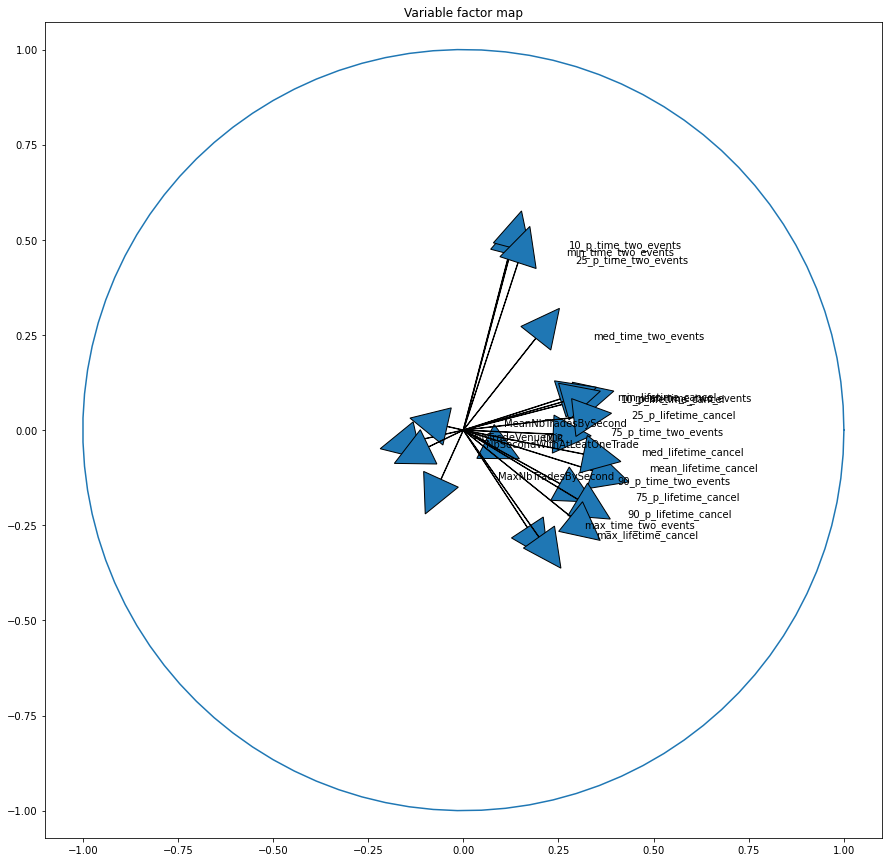

In [30]:
import numpy as np

df = X2
reduced=result

n_components = 2
 
# on rajoute des colonnes PC1 et PC2
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())


# plan factoriel pour les deux premieres composantes principales
(fig, ax) = plt.subplots(figsize=(15, 15))

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],head_width=0.1, head_length=0.1) #0 pour PC1 et 1 pour PC2

    plt.text(pca.components_[0, i] + 0.15, pca.components_[1, i], df.columns[i])


an = np.linspace(0, 2 * np.pi, 100) #on trace un cercle pour l'échelle
plt.plot(np.cos(an), np.sin(an)) 

plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()